Выполнила студентка гр. 343М Бобылева Е.В.

Набор данных с устройства пожарной сигнализации. Ссылка на источник: https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset/data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')

#data = pd.read_csv('smoke_detection_iot.csv')
data = pd.read_csv('gdrive/My Drive/smoke.csv')
# удаление id (уникальных значений)
data = data.drop("Unnamed: 0",axis=1)
data = data.drop(columns=["CNT"])
data_Fire_Alarm = data["Fire Alarm"]
data_without_Fire_Alarm = data.drop(columns=["UTC","Fire Alarm"])
display(data)
# UTC: Время проведения эксперимента.
# Temperature[C]: температура окружающей среды, измеряемая в градусах Цельсия.
# Humidity[%]: влажность воздуха во время эксперимента.
# TVOC[ppb]: общее количество летучих органических соединений, измеренное в ppb (частей на миллиард).
# eCO2[ppm]: эквивалентная концентрация CO2, измеряемая в ppm (частях на миллион).
# Raw H2: количество сырого водорода [сырой молекулярный водород; не компенсируется (смещение, температура и т. д.)] присутствует в окружающей среде
# Raw Ethanol: количество сырого этанола, присутствующего в окружающей среде.
# Pressure[hPa]: Давление воздуха, измеряется в гПа.
# PM1.0: Частицы диаметром менее 1,0 микрометра.
# PM2.5: Частицы диаметром менее 2,5 микрометра.
# NC0.5: Концентрация твердых частиц диаметром менее 0,5 микрометра.
# NC1.0: Концентрация твердых частиц диаметром менее 1,0 микрометра.
# NC2.5: Концентрация твердых частиц диаметром менее 2,5 микрометра.
# CNT: количество выборок.

# Пожарная сигнализация (реальность). Если пожар присутствовал, значение равно 1, иначе — 0.
# Fire Alarm: 1 означает положительный результат, 0 означает отрицательный результат.

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/gdrive


,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,1654733331,20.000,57.36,0,400.0,12306.0,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,1654733332,20.015,56.67,0,400.0,12345.0,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,1654733333,20.029,55.96,0,400.0,12374.0,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,1654733334,20.044,55.28,0,400.0,12390.0,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,1654733335,20.059,54.69,0,400.0,12403.0,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62630,1655130048,18.653,15.87,612,400.0,13731.0,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
62631,1655130049,18.867,15.84,627,400.0,13725.0,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
62632,1655130050,19.083,16.04,638,400.0,13712.0,20566,936.680,0.57,0.59,3.92,0.611,0.014,0
62633,1655130051,19.299,16.52,643,400.0,13696.0,20543,936.676,0.57,0.59,3.90,0.607,0.014,0


In [ ]:
# Fire Alarm - целевой вектор, принимает значения 0 или 1. Количество уникальных значений колонки Fire Alarm.
data['Fire Alarm'].value_counts()

,count
Fire Alarm,
1,43438
0,19197


In [ ]:
from datetime import datetime

time = []
for i in data['UTC']:
    t = datetime.fromtimestamp(i)
    time.append(t)
data['Time'] = time

display(data)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm,Time
0,1654733331,20.000,57.36,0,400.0,12306.0,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,2022-06-09 00:08:51
1,1654733332,20.015,56.67,0,400.0,12345.0,18651,939.744,0.00,0.00,0.00,0.000,0.000,0,2022-06-09 00:08:52
2,1654733333,20.029,55.96,0,400.0,12374.0,18764,939.738,0.00,0.00,0.00,0.000,0.000,0,2022-06-09 00:08:53
3,1654733334,20.044,55.28,0,400.0,12390.0,18849,939.736,0.00,0.00,0.00,0.000,0.000,0,2022-06-09 00:08:54
4,1654733335,20.059,54.69,0,400.0,12403.0,18921,939.744,0.00,0.00,0.00,0.000,0.000,0,2022-06-09 00:08:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62630,1655130048,18.653,15.87,612,400.0,13731.0,20588,936.678,0.61,0.63,4.18,0.652,0.015,0,2022-06-13 14:20:48
62631,1655130049,18.867,15.84,627,400.0,13725.0,20582,936.687,0.57,0.60,3.95,0.617,0.014,0,2022-06-13 14:20:49
62632,1655130050,19.083,16.04,638,400.0,13712.0,20566,936.680,0.57,0.59,3.92,0.611,0.014,0,2022-06-13 14:20:50
62633,1655130051,19.299,16.52,643,400.0,13696.0,20543,936.676,0.57,0.59,3.90,0.607,0.014,0,2022-06-13 14:20:51


In [ ]:
data.drop('UTC', axis= 1 , inplace= True)
data.drop('Time', axis= 1 , inplace= True)
# удаление колонок
data = data.drop(columns=["PM2.5","NC1.0", "NC2.5"])
# Удаление пропусков
data = data.dropna()
# Удаление дубликатов
data = data.drop_duplicates()
# было удалено 5 строк: 1 - с пропусками, 4 - с повторяющимися значениями
display(data)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC0.5,Fire Alarm
0,20.000,57.36,0,400.0,12306.0,18520,939.735,0.00,0.00,0
1,20.015,56.67,0,400.0,12345.0,18651,939.744,0.00,0.00,0
2,20.029,55.96,0,400.0,12374.0,18764,939.738,0.00,0.00,0
3,20.044,55.28,0,400.0,12390.0,18849,939.736,0.00,0.00,0
4,20.059,54.69,0,400.0,12403.0,18921,939.744,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400.0,13723.0,20569,936.670,0.63,4.32,0
62626,18.653,15.87,612,400.0,13731.0,20588,936.678,0.61,4.18,0
62627,18.867,15.84,627,400.0,13725.0,20582,936.687,0.57,3.95,0
62628,19.083,16.04,638,400.0,13712.0,20566,936.680,0.57,3.92,0


In [ ]:
data['Fire Alarm'].value_counts()

,count
Fire Alarm,
1,43438
0,19190


In [ ]:
# Удаление информационных выбросов
# Z-оценка показывает, сколько стандартных отклонений
# данного значения от среднего.Вы можете определить наблюдение
# как выброс, если его z-оценка меньше -3 или больше 3.
import scipy.stats as stats

z = np.abs(stats.zscore(data))
data_clean = data[(z<3).all(axis=1)]
data_clean.shape

data_clean['Fire Alarm'].value_counts()

,count
Fire Alarm,
1,42317
0,16681


In [ ]:
# data1 = data[(data['Temperature[C]'] < -40) & (data['Temperature[C]'] > 30)]
# display(data1)

data_clean.describe().loc[['min','max']]

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC0.5,Fire Alarm
min,-22.01,21.96,0.0,400.0,12306.0,18520.0,936.750,0.00,0.0,0.0
max,52.13,75.08,24861.0,1014.0,13561.0,21401.0,939.861,27.42,188.7,1.0


In [ ]:
#нормализация данных датасета
from sklearn import preprocessing
array = preprocessing.normalize(data_clean, axis = 0, norm = 'max')
norm_data = pd.DataFrame(data = array, columns = data.columns)

display(norm_data)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC0.5,Fire Alarm
0,0.383656,0.763985,0.000000,0.394477,0.907455,0.865380,0.999866,0.000000,0.000000,0.0
1,0.383944,0.754795,0.000000,0.394477,0.910331,0.871501,0.999876,0.000000,0.000000,0.0
2,0.384213,0.745338,0.000000,0.394477,0.912470,0.876781,0.999869,0.000000,0.000000,0.0
3,0.384500,0.736281,0.000000,0.394477,0.913649,0.880753,0.999867,0.000000,0.000000,0.0
4,0.384788,0.728423,0.000000,0.394477,0.914608,0.884118,0.999876,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
58993,0.048916,0.359750,0.499537,0.394477,0.955534,0.898042,0.996789,0.369803,0.369846,0.0
58994,0.047535,0.360282,0.545272,0.394477,0.952290,0.894725,0.996795,0.622903,0.623052,0.0
58995,0.046173,0.365876,0.577410,0.394477,0.950594,0.892155,0.996788,0.955507,0.955750,0.0
58996,0.044792,0.367874,0.669321,0.394477,0.948381,0.889631,0.996796,0.889132,0.889295,0.0


In [ ]:
from imblearn.over_sampling import SMOTE

y = norm_data["Fire Alarm"]
x = norm_data.drop(["Fire Alarm"],axis =1)

smote = SMOTE(
    sampling_strategy= 0.9,#'auto',  # Стратегия выборки. 'auto' означает увеличение меньшего класса до размера большинственного.
    random_state=None,         # Зерно для генератора случайных чисел.
    k_neighbors=5,             # Количество ближайших соседей для создания синтетических примеров.
    n_jobs=1                   # Количество ядер для параллельной работы. -1 означает использование всех доступных ядер.
)

x_resampled, y_resampled = smote.fit_resample(x, y)

smote_data = x_resampled
smote_data['Fire Alarm'] = y_resampled

smote_data['Fire Alarm'].value_counts()

# auto
# Fire Alarm
# 0.0    42317
# 1.0    42317

,count
Fire Alarm,
1.0,42317
0.0,38085


In [ ]:
# разделение данных на три подвыборки: обучающую, тестовую и валидационную(отложенную)
# Обучающая (train) - 60%; валидационная (validate) - 20 %; тестовая (test) - 20 %

train, validate, test = np.split(smote_data.sample(frac=1, random_state=42), [int(.6*len(smote_data)), int(.8*len(smote_data))])
#train, validate, test = np.split(data_clean_2.sample(frac=1, random_state=42), [int(.6*len(data_clean_2)), int(.8*len(data_clean_2))])

In [ ]:
train['Fire Alarm'].value_counts()

,count
Fire Alarm,
1.0,25413
0.0,22828


In [ ]:
validate['Fire Alarm'].value_counts()

,count
Fire Alarm,
1.0,8433
0.0,7647


In [ ]:
test['Fire Alarm'].value_counts()

,count
Fire Alarm,
1.0,8471
0.0,7610


In [ ]:
y_train = train["Fire Alarm"]
x_train = train.drop(["Fire Alarm"],axis = 1)
y_validate = validate["Fire Alarm"]
x_validate = validate.drop(["Fire Alarm"],axis = 1)
y_test = test["Fire Alarm"]
x_test = test.drop(["Fire Alarm"],axis = 1)

In [ ]:
import tensorflow.keras as ks
import tensorflow as tf
def parametrized_train(x_train, y_train, x_test, y_test, neurons, activationFunction, validationSplit, batchSize, nEpochs):
    # model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(neurons, activation=activationFunction),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # model.compile(optimizer='sgd', loss='mean_squared_error')
    model.compile(
        loss=tf.keras.losses.binary_crossentropy,
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        metrics=[
            tf.keras.metrics.BinaryAccuracy(name='accuracy'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
    )

    #model = ks.models.Sequential()
    #model.add(ks.layers.Dense(800, input_dim=x_train.shape[1], activation='relu'))
    #model.add(ks.layers.Dense(neurons, activation=activationFunction))
    #model.add(ks.layers.Dense(y_train.shape[0], activation="softmax")) #
    #model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(x_train, y_train, verbose=1, batch_size=batchSize, epochs=nEpochs, validation_split=validationSplit)

    train_accuracy = model.evaluate(x_train, y_train)
    test_accuracy = model.evaluate(x_test, y_test)

    return train_accuracy, test_accuracy

Функция создания и обучения нейронной сети с парметрами:
* входной слой с числом нейронов neurons,
* активационной функцией activationFunction,
* числом тестовой выборки относительно общего размера validationSplit,
* числом объектов для обработки после которого обновляются веса batchSize,
* числом эпох nEpochs

Функция возвращает список из точности на обучающем и тестовом наборах данных

In [ ]:
from IPython.display import clear_output
neurons = (10, 100, 500)
activationFunction = 'relu';
validationSplit = 0.2;
batchSize = 200;
nEpochs = 10;

results = pd.DataFrame(columns=('Число нейронов', 'Точность на обучающей', 'Точность на тестовой'));

for i in neurons:
    trainAccuracy, testAccuracy = parametrized_train(x_train, y_train, x_test, y_test, i, activationFunction, validationSplit, batchSize, nEpochs)
    results.loc[results.shape[0] + 1] = (i, trainAccuracy[1], testAccuracy[1])

clear_output()

print(results)

   Число нейронов  Точность на обучающей  Точность на тестовой
1            10.0               0.930723              0.931534
2           100.0               0.947659              0.946023
3           500.0               0.951411              0.951309


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
# model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# model.compile(optimizer='sgd', loss='mean_squared_error')
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [ ]:
history = model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1508/1508 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7070 - loss: 0.5805 - precision: 0.7051 - recall: 0.7755
Epoch 2/30
1508/1508 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8508 - loss: 0.4300 - precision: 0.8618 - recall: 0.8557
Epoch 3/30
1508/1508 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8658 - loss: 0.4083 - precision: 0.8734 - recall: 0.8692
Epoch 4/30
1508/1508 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8663 - loss: 0.4075 - precision: 0.8724 - recall: 0.8739
Epoch 5/30
1508/1508 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8717 - loss: 0.3838 - precision: 0.8790 - recall: 0.8792
Epoch 6/30
1508/1508 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8810 - loss: 0.3619 - precision: 0.8880 - recall: 0.8846
Epoch 7/30
1508/1508 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8869 - loss: 0.3420 - precision: 0.8930 - recall: 0.8922
Epoch 8/30
1508/1508 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8860 - loss: 0.3284 - precision: 0.8941 - recall: 0.8888


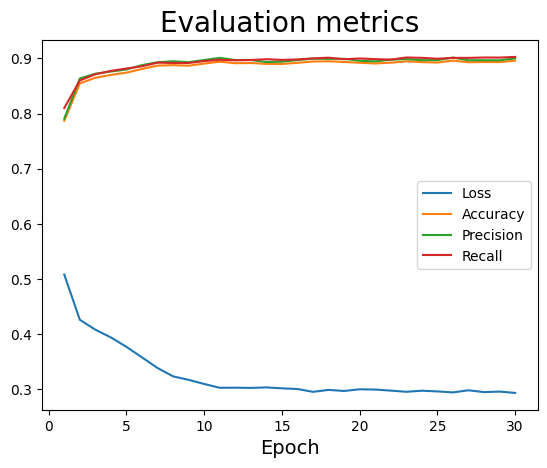

In [ ]:
plt.plot(
    np.arange(1, 31),
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 31),
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 31),
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 31),
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [ ]:
predictions = model.predict(x_test)

503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.5f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.5f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.5f}')

Accuracy: 0.87451
Precision: 0.84379
Recall: 0.93484


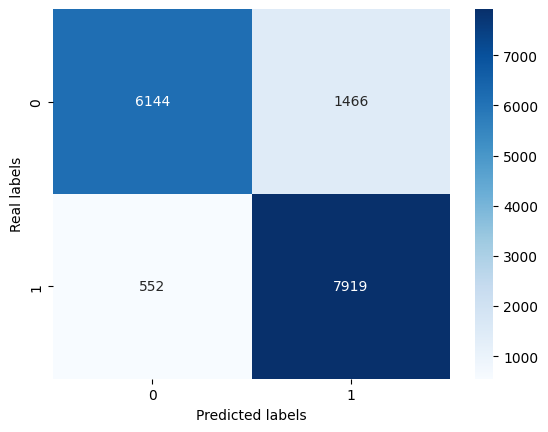

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, prediction_classes)
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g')
plt.ylabel('Real labels')
plt.xlabel('Predicted labels')
plt.show()